In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, Lasso
from sklearn.svm import LinearSVR
from src.data import make_dataset
from src.features import build_features,build_targets
from src.models import predict_model, train_model, split_data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
seed=42

In [3]:
# Load data
molecules=make_dataset.load()

In [87]:
# Build the features
X=build_features.build(molecules,fpSize=1024)

mean value of features = 0.6247121175130208


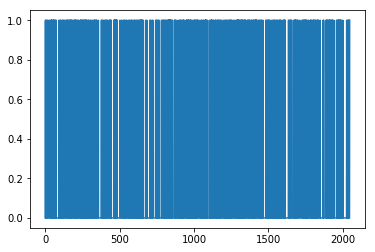

In [46]:
# Plot one of the feature vectors
plt.plot(X[900])
plt.show()

In [74]:
# Build the targets
keep=['H960-003','Amb-751']
(y,aptamers)=build_targets.build_fold(molecules,keep)

Column names are Target, H960-266, H960-319, H960-850, H960-892, H960-735, H960-425, H960-940, H960-613, H960-251, H960-003, H960-875, H960-650, H960-172, H960-186, H960-050, H960-594, H960-228, H960-316, H960-488, H960-629, H960-668, H960-5050, H960-561, H960-156, H960-922, H960-843, H960-616, H960-617, H960-505, H960-072, H960-724, H960-315, H960-939, H960-256, H960-920, H960-869, H960-356, H960-337, H960-540, NSRef-630, NS-404, NS-231, NS-160, Amb-767, Amb-563, Amb-113, Amb-751, Amb-816, Amb-720, Amb-318, Amb-6319
Processed 101 targets.
['1A4', '1C5', '1C7', '1F7', '101B7', '101C7', '101D11', '101D7', '101D9', '101E10', '101E6', '101F11', '101F2', '101F7', '101G6', '101H6', '111E3', '111H2', '111H7', '11D3', '21G8', '31B11', '31B9', '31C10', '31C2', '31C3', '31C8', '31D4', '31D7', '31D8', '31E10', '31E3', '31E4', '31E7', '31E9', '31F10', '31H10', '41A11', '41C4', '41C5', '41C7', '41D10', '41D4', '41D7', '41E10', '41E2', '41E3', '41E4', '41E7', '41E9', '41F10', '41F2', '41F3', '41F4'

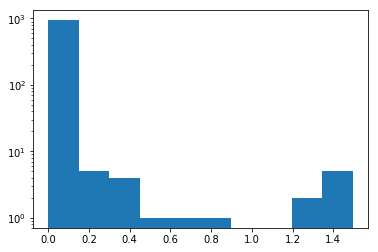

In [49]:
# Plot the target distribution
plt.hist(y[0])
plt.yscale('log')
plt.show()

In [89]:
# Create train/test sets
X_train, X_test, y_train, y_test, ind_train, ind_test = split_data.split(0.4,X,np.transpose(y),seed)
y_test=np.transpose(y_test)
y_train=np.transpose(y_train)
mol_test=[molecules[x] for x in ind_test]
mol_train=[molecules[x] for x in ind_train]

Fraction hits: train: 0.020, test: 0.025


In [101]:
# Test models to choose best one based on cross-validation over training set
test_aptamer=1
max_features=50
train_model.cv_model(LinearRegression(), X_train, y_train[test_aptamer])
train_model.cv_model_sfm(LinearRegression(), X_train, y_train[test_aptamer],max_features=max_features)
train_model.cv_model(LinearSVR(C=.000001,max_iter=10000,epsilon=0.1), X_train, y_train[test_aptamer])
train_model.cv_model(LassoCV(), X_train, y_train[test_aptamer])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
{'fit_time': array([0.03459096, 0.02601719, 0.02591586]), 'score_time': array([0.00115895, 0.00053096, 0.00056291]), 'test_score': array([-0.03224491, -0.02255614, -0.02799374]), 'train_score': array([-5.00705862e-31, -3.69370324e-31, -7.20115237e-31])}
Cross-validation scores: test=-0.028+-0.004, train=-0.000+-0.000
features: [  18   21   75   78   83  114  121  134  158  173  176  217  239  267
  302  313  316  320  339  369  376  378  384  415  425  455  462  466
  476  501  512  513  599  612  613  614  780  783  820  873  877  909
  937  940  961  983  989  992 1003 1016]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
{'fit_time': array([0.00132298, 0.00103879, 0.00090718]), 'score_time': array([0.00025702, 0.00023031, 0.00024104]), 'test_score': array([-0.02009272, -0.0103758 , -0.01205651]), 'train_score': array([-0.00855514, -0.0128776 , -0.01249376])}
Cross-validati

/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [92]:
# Define models (with a model for each aptamer)
models=[
    [ LinearRegression() for _ in y],
    [ Lasso(alpha=0.5) for _ in y],
    [ Lasso(alpha=0.99) for _ in y],
    [ Ridge(alpha=0.9) for _ in y],
    [ Ridge(alpha=0.99) for _ in y],
    [ LinearSVR(C=.000001,max_iter=10000,epsilon=0.1,random_state=seed) for _ in y],
    [ LinearSVR(C=.000001,max_iter=10000,epsilon=0.05,random_state=seed) for _ in y]
]

In [43]:
# Reduce the number of features
X_train_red=[]
for model in models:
    Xtmp=[]    
    for i in range(len(aptamers)):
        smodel = SelectFromModel(model[i].fit(X_train,y_train[i]), prefit=True,max_features=3)
        print(smodel)
        print(smodel.get_support(indices=True))
        X_new = smodel.transform(X_train)
        print(X_new.shape)
        Xtmp.append(X_new)
    X_train_red.append(Xtmp)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=3, norm_order=1, prefit=True, threshold=None)
[535 678 709]
(576, 3)
SelectFromModel(estimator=Lasso(alpha=0.5, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=3, norm_order=1, prefit=True, threshold=None)
[]
(576, 0)
SelectFromModel(estimator=Lasso(alpha=0.99, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                war

/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/feature_selection/base.py:79: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/feature_selection/base.py:79: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [11]:
# Train models
models=[train_model.train_multi(LinearSVR(C=.000001,max_iter=10000,epsilon=0.1,random_state=seed),X_train,y_train)]

Cross-validation scores = -87.79 +- 162.42


/opt/anaconda3/envs/moldist2/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


------
LinearSVR(C=10, dual=True, epsilon=0.1, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=42, tol=0.0001, verbose=0)
Train:
score= [0.5405530252202837]
mean(score)=0.541
Test:
score= [-0.09601006214352514]
mean(score)=-0.096


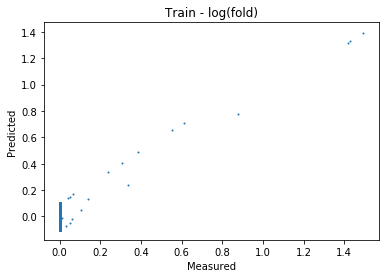

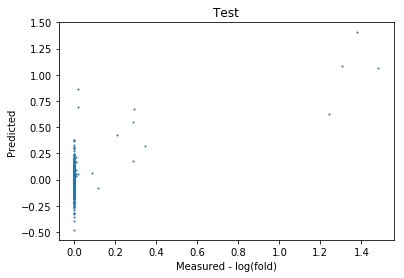

In [12]:
# Test model
for model in models:
    print("------")
    print(model[0])
    print("Train:")
    yp_train=predict_model.predict_reg(model,X_train,y_train,mol_train)
    print("Test:")
    yp_test=predict_model.predict_reg(model,X_test,y_test,mol_test)

    for i in range(len(y_train[0])):
        plt.scatter([y[i] for y in y_train],[y[i] for y in yp_train],label="Train",s=1)
    ax=plt.gca()
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    plt.xlabel("Measured")
    plt.ylabel("Predicted")
    plt.title("Train - log(fold)")
    plt.show()
    
    for i in range(len(y_test[0])):
        plt.scatter([y[i] for y in y_test],[y[i] for y in yp_test],label="Test",s=1)
    ax=plt.gca()
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    plt.xlabel("Measured - log(fold)")
    plt.ylabel("Predicted")
    plt.title("Test")
    plt.show()

